In [193]:
from pprint import pprint

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation

D:\Conda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [192]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [66]:
raw = pd.read_csv("data/Speed-Dating-Data.csv", encoding="windows-1252")

In [67]:
dropping = ["idg", "condtn", "position", "positin1", "field", "undergra", "mn_sat", "tuition", "from", "zipcode", "career",
           "exphappy", "attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]
data = raw.drop(columns=dropping)

### Lists of data sections for future column selection

In [95]:
activities = ["gender", "sports", "tvsports", "exercise", "dining", "museums","art", "hiking", 
              "gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", 
              "shopping", "yoga"]

ratings_of_partner = ["attr", "intel", "fun", "amb","shar", "like", "prob", "met"]
ratings_from_partner = []

importance = []
partners_importance = []

### Unique person information

In [111]:
people = dict()
matches = dict()
for index, row in data.iterrows():
    iid = row["iid"]     
    if iid in people:
        continue
    people[iid] = row[activities]
people = pd.DataFrame(data=people)

In [112]:
people.T.head()

,gender,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
1,0,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1
2,0,3,2,7,10,8,6,3,5,8,10,1,9,8,7,8,3,1
3,0,3,8,7,8,5,5,8,4,5,7,8,7,7,7,5,8,7
4,0,1,1,6,7,6,7,7,5,7,7,7,9,7,8,7,1,8
5,0,7,4,7,7,6,8,6,6,8,6,8,6,6,3,7,8,3


In [88]:
data["age_diff"] = (data["age"] - data["age_o"]).abs()

In [96]:
training_features = ["dec", "int_corr", "samerace", "age_diff", "attr", "intel", "fun", "like"]

training = pd.DataFrame(data, columns=training_features)

In [97]:
training.head()

,dec,int_corr,samerace,age_diff,attr,intel,fun,like
0,1,0.14,0,6.0,6.0,7.0,7.0,7.0
1,1,0.54,0,1.0,7.0,7.0,8.0,7.0
2,1,0.16,1,1.0,5.0,9.0,8.0,7.0
3,1,0.61,0,2.0,7.0,8.0,7.0,7.0
4,1,0.21,0,3.0,5.0,7.0,7.0,6.0


In [104]:
training = training.dropna()

# Correlation matrix

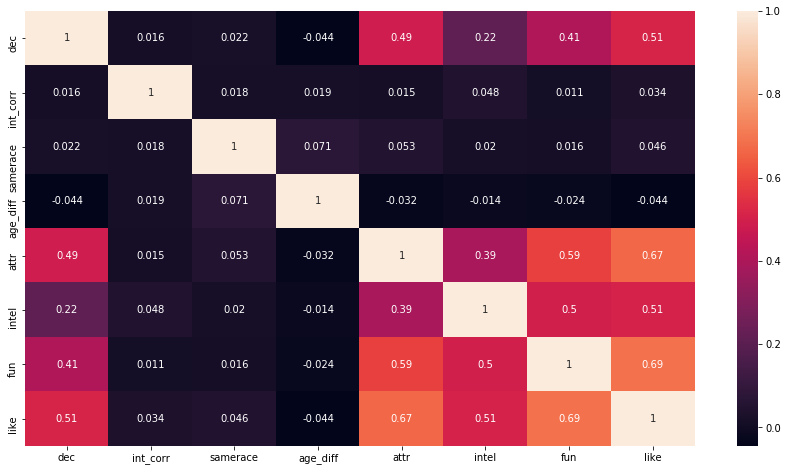

In [116]:
plt.figure(figsize=(15,8))
sns.heatmap(training.corr(), annot=True)

In [108]:
# plt.figure(figsize=(20,10))
# sns.pairplot(training)

In [117]:
sc = StandardScaler()
X = sc.fit_transform(training.dropna())

In [118]:
p = 0.9
n = len(training)

In [125]:
train = training[:int(n*p)]
test = training[int(n*p):]

In [126]:
label = training_features[0]

y_train = train[label].values
X_train = train.drop(columns=label).values

y_test = test[label].values
X_test = test.drop(columns=label).values

In [128]:
X_train.shape

(6940, 7)

### Dense NN

In [214]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [215]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [216]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                80        
_________________________________________________________________
dense_16 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 31        
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


In [217]:
hist = model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
6940/6940 [==============================] - 1s 118us/step - loss: 0.6581 - acc: 0.6360
Epoch 2/10
6940/6940 [==============================] - 1s 76us/step - loss: 0.5558 - acc: 0.7203
Epoch 3/10
6940/6940 [==============================] - 0s 71us/step - loss: 0.5342 - acc: 0.7282
Epoch 4/10
6940/6940 [==============================] - 0s 71us/step - loss: 0.5228 - acc: 0.7380
Epoch 5/10
6940/6940 [==============================] - 0s 71us/step - loss: 0.5177 - acc: 0.7406
Epoch 6/10
6940/6940 [==============================] - 0s 71us/step - loss: 0.5111 - acc: 0.7448
Epoch 7/10
6940/6940 [==============================] - 0s 71us/step - loss: 0.5080 - acc: 0.7455
Epoch 8/10
6940/6940 [==============================] - 0s 71us/step - loss: 0.5050 - acc: 0.7471
Epoch 9/10
6940/6940 [==============================] - 0s 72us/step - loss: 0.5038 - acc: 0.7483
Epoch 10/10
6940/6940 [==============================] - 1s 72us/step - loss: 0.4973 - acc: 0.7542: 0s - loss: 0.4976

In [218]:
y_pred = model.predict(X_test, batch_size=128)
print(y_pred[:5])

[[0.07296565]
 [0.69824415]
 [0.35301498]
 [0.40362048]
 [0.773126  ]]


In [219]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy: {acc}, loss: {loss}")

772/772 [==============================] - 0s 149us/step
Accuracy: 0.7538860103626943, loss: 0.49290561784116715


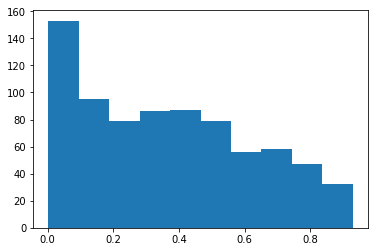

In [220]:
plt.hist(y_pred)
plt.show()

In [221]:
y_pred = (y_pred > 0.5)

In [222]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[409  64]
 [126 173]]
